In [11]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 587.2 kB/s eta 0:00:13
   -- ------------------------------------- 0.5/8.1 MB 587.2 kB/s eta 0:00:13
   -- ------------------------------------- 0.5/8.1 MB 587.2 kB/s eta 0:00:13
   --- ------------------------------------ 0.8/8.1 MB 467.0 kB/s eta 0:00:16
   --- ------------------------------------ 0.8/8.1 MB 467.0 kB/s eta 0:00:16
   ----- ---------------------------------- 1.0/8.1 MB 543.6 kB/s eta 0:00:14
   ----- ---------------------------------- 1.0/8.1 MB 543.6 kB/s eta 0:00:14
   ----- ----------------------

In [9]:
pip install tabulate

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


The value of average is:  50.0
The values of the error rate are:  [6, 2, 1, 7, 3, 2]
The values of j for each time period are:  [53.0, 51.0, 50.5, 53.5, 51.5, 51.0]
+-----+-----------+------------+-----------+
|   t |   U (avg) |   Error eJ |   J value |
+=====+===========+============+===========+
|   1 |        50 |          6 |      53   |
+-----+-----------+------------+-----------+
|   2 |        50 |          2 |      51   |
+-----+-----------+------------+-----------+
|   3 |        50 |          1 |      50.5 |
+-----+-----------+------------+-----------+
|   4 |        50 |          7 |      53.5 |
+-----+-----------+------------+-----------+
|   5 |        50 |          3 |      51.5 |
+-----+-----------+------------+-----------+
|   6 |        50 |          2 |      51   |
+-----+-----------+------------+-----------+


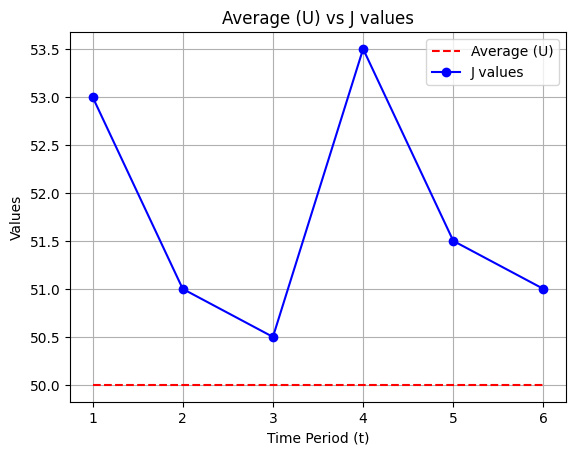

In [14]:
import random
from tabulate import tabulate
import matplotlib.pyplot as plt

new=[]
U=float(input("Enter the average value: "))
phi=float(input("Enter the percentage: "))
n=int(input("Enter the range: "))
E_j_t_1= [random.randint(1, 9) for _ in range(n)]
for i in range(n):
    J=U + E_j_t_1[i] * phi
    new.append(J)
print("The value of average is: ", U)
print("The values of the error rate are: ", E_j_t_1)
print("The values of j for each time period are: ", new)

table_data = []
for i in range(n):
    table_data.append([i+1, U, E_j_t_1[i], new[i]])
print(tabulate(table_data, headers=["t", "U (avg)", "Error eJ", "J value"], tablefmt="grid"))


t_values = list(range(1, n+1))
plt.plot(t_values, [U]*n, label="Average (U)", linestyle="--", color="red")
plt.plot(t_values, new, label="J values", marker="o", color="blue")
plt.xlabel("Time Period (t)")
plt.ylabel("Values")
plt.title("Average (U) vs J values")
plt.legend()
plt.grid(True)
plt.show()